# Practica 0: Montecarlo

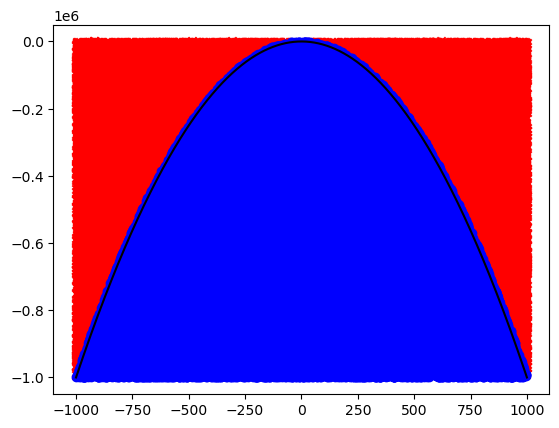

Resultado integral Lenta: 0.06654098481277225
Total de puntos dentro (L): 66673
Tiempo de la funcion lenta: 0.0
Resultado integral Rapida: 0.06654098481277225
Total de puntos dentro (R): 66673
Tiempo que ha tomado la funcion rápida: 0.0


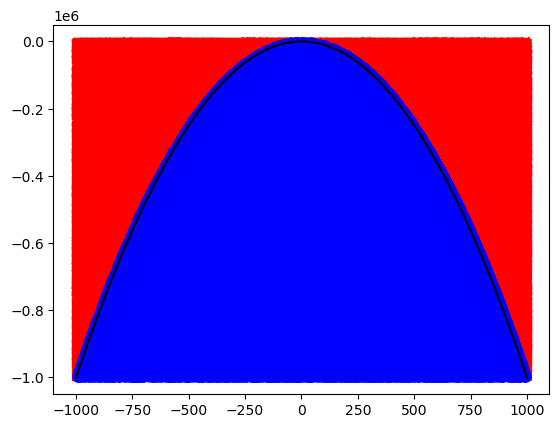

Resultado integral Lenta: 0.006294759523137322
Total de puntos dentro (L): 216519
Tiempo de la funcion lenta: 0.0
Resultado integral Rapida: 0.006294759523137322
Total de puntos dentro (R): 216519
Tiempo que ha tomado la funcion rápida: 15.625


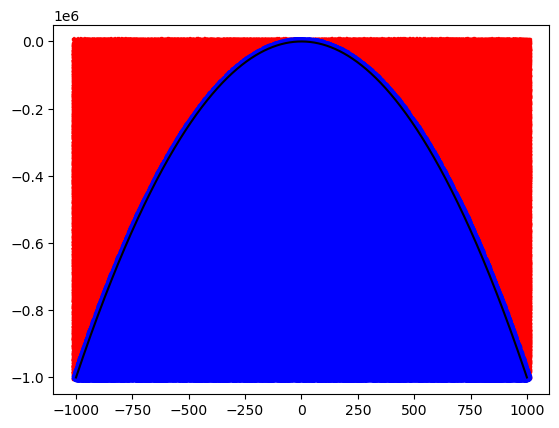

Resultado integral Lenta: 0.0022007187223490863
Total de puntos dentro (L): 366877
Tiempo de la funcion lenta: 31.25
Resultado integral Rapida: 0.0022007187223490863
Total de puntos dentro (R): 366877
Tiempo que ha tomado la funcion rápida: 15.625


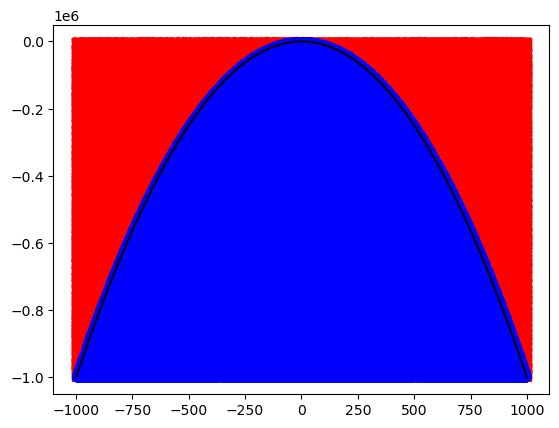

Resultado integral Lenta: 0.0011066065348077556
Total de puntos dentro (L): 516139
Tiempo de la funcion lenta: 62.5
Resultado integral Rapida: 0.0011066065348077556
Total de puntos dentro (R): 516139
Tiempo que ha tomado la funcion rápida: 15.625


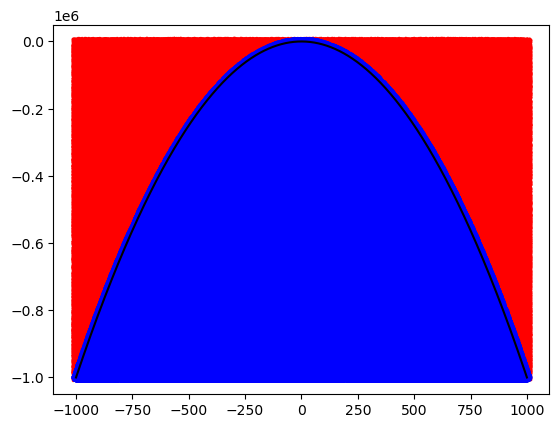

Resultado integral Lenta: 0.0006647232213989521
Total de puntos dentro (L): 666054
Tiempo de la funcion lenta: 62.5
Resultado integral Rapida: 0.0006647232213989521
Total de puntos dentro (R): 666054
Tiempo que ha tomado la funcion rápida: 15.625


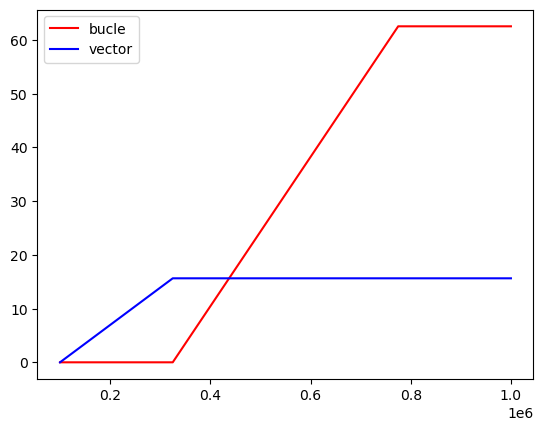

In [2]:
# Practica 0
import numpy as np
import matplotlib.pyplot as plt # drawing library (same one i used in PEV)
import time as t 

# Funcion
def cuadrado(x):
    return -(x * x)

#Returns whether is f(x) is lower than the point
def is_behind(fun, x, y):
    Y = fun(x)
    return y < Y 

# Generates random points
def gen_points(min_, max_, num_puntos):
    a = np.zeros(num_puntos)
    for i in range(num_puntos):
        a[i] = np.random.uniform(min_, max_, 1)

    return a

# Draws the graphic
def draw_graphic(x, y, ry):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.plot(x, y, color='black') # draws line
    plt.scatter(x[np.where(ry > y)], ry[np.where(ry > y)], marker='x', color='red') # draws a x when is out
    plt.scatter(x[(ry <= y)], ry[(ry <= y)], marker='o', color='blue') # draws an o when it's in
    plt.show()

#basic integral 
def integra_mc(fun, a, b, num_puntos=1000):
    # x points of the main curve
    x = np.linspace(a, b, num_puntos)
    y = fun(x) # y=f(x)

    # random x points, coord X
    ry = gen_points(min(y), max(y), num_puntos)

    draw_graphic(x, y, ry)

    return y, ry

# Slow integral
def integraLenta(fun, a, b, y, ry):

    count = 0
    inicio = t.process_time()
   
    for i in range(len(ry)):
        if ry[i] < y[i]:
            count += 1

    #results 
    print("Resultado integral Lenta: " + str(count/len(ry) * (b - a) * max(y)))
    print("Total de puntos dentro (L): " + str(count))
    
    fin = t.process_time()
    
    #total time (secs)
    tiempo = 1000 * (fin- inicio)
    print("Tiempo de la funcion lenta: " + str(tiempo))
    
    return tiempo

# Fast integral using numpy
def integraRapida(fun, a, b, y, ry):

    inicio = t.process_time()
    # fast
    res = np.sum(ry < y)

    # results
    print("Resultado integral Rapida: " + str(res/len(ry) * (b - a) * max(y)))
    print("Total de puntos dentro (R): " + str(res))

    
    fin = t.process_time()
    
    #total time (secs)
    tiempo = 1000 * (fin- inicio)
    print("Tiempo que ha tomado la funcion rápida: " + str(tiempo))
    return tiempo


# MAIN #############################################################################

#create a tuple with random quantity of points
sizes = np.linspace(100000, 1000000, 5)

tiempo_integralLenta = []
tiempo_integralRapida = []

#calculates the time for each integral
for size in sizes:
    y, ry = integra_mc(cuadrado, -1000, 1000, int(size))
    tiempo_integralLenta += [integraLenta(cuadrado, 1000, 2, y, ry)]
    tiempo_integralRapida += [integraRapida(cuadrado, 1000, 2, y, ry)]

#draw
plt.figure()
plt.plot(sizes, tiempo_integralLenta, c='red', label='bucle')
plt.plot(sizes, tiempo_integralRapida, c='blue', label='vector')
plt.legend()
plt.show()

